In [3]:
# A heap is a great option whenever you need to find the maximum or minimum of something repeatedly.

In [1]:
import pandas as pd
import numpy as np
import heapq

C:\Users\avi\.continuum\anaconda3_new\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\avi\.continuum\anaconda3_new\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


#### 1

#### 2

#### 3

#### 4

#### Intro

In [2]:
# A heap is a data structure that is an implementation of the priority queue.

# Note that a priority queue is an abstract data structure. A heap is one of many ways to implement a priority queue. 
# However, people often use the two terms interchangeably. In this course, we will use the term "heap".

# A heap is a container that stores elements, and supports the following operations:

# Add an element in O(log⁡n)
# Remove the minimum element in O(log⁡n)
# Find the minimum element in O(1)


In [ ]:
# A heap can also find the max elements instead of the min elements. 
# If a heap is configured to find/remove the min element, it's called a min heap. 
# If it's configured to find/remove the max element, it's called a max heap.

In [3]:
# The ability to find the max/min element in constant time, 
# while only needing logarithmic time to maintain this ability through changes makes a heap an extremely powerful data structure.

There are multiple ways to implement a heap, although the most popular way is called a binary heap using an array. In the trees and graphs chapter, we saw that binary trees are typically implemented with a Node object.

A binary heap implements a binary tree, but with only an array. The idea is that each element in the array is a node in the tree. The smallest element in the tree is the root, and the following property is maintained at every node: if A is the parent of B, then A.val <= B.val. Notice that this property directly implies that the root is the smallest element.

The parent-child relationships are done using math with the indices. The first element at index 0 is the root, then the elements at indices 1 and 2 are the root's children, the elements at indices 3 and 4 are the children of the element at index 1 and the elements at indices 5 and 6 are the children of the element at index 2, and so on. If a node is at index i, then its children are at indices 2i + 1 and 2i + 2. When elements are added or removed, operations are done to maintain the aforementioned property of parent.val <= child.val. The number of operations needed scales logarithmically with the number of elements in the heap, and the process is known as "bubbling up".

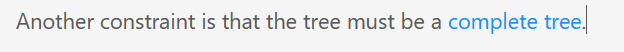

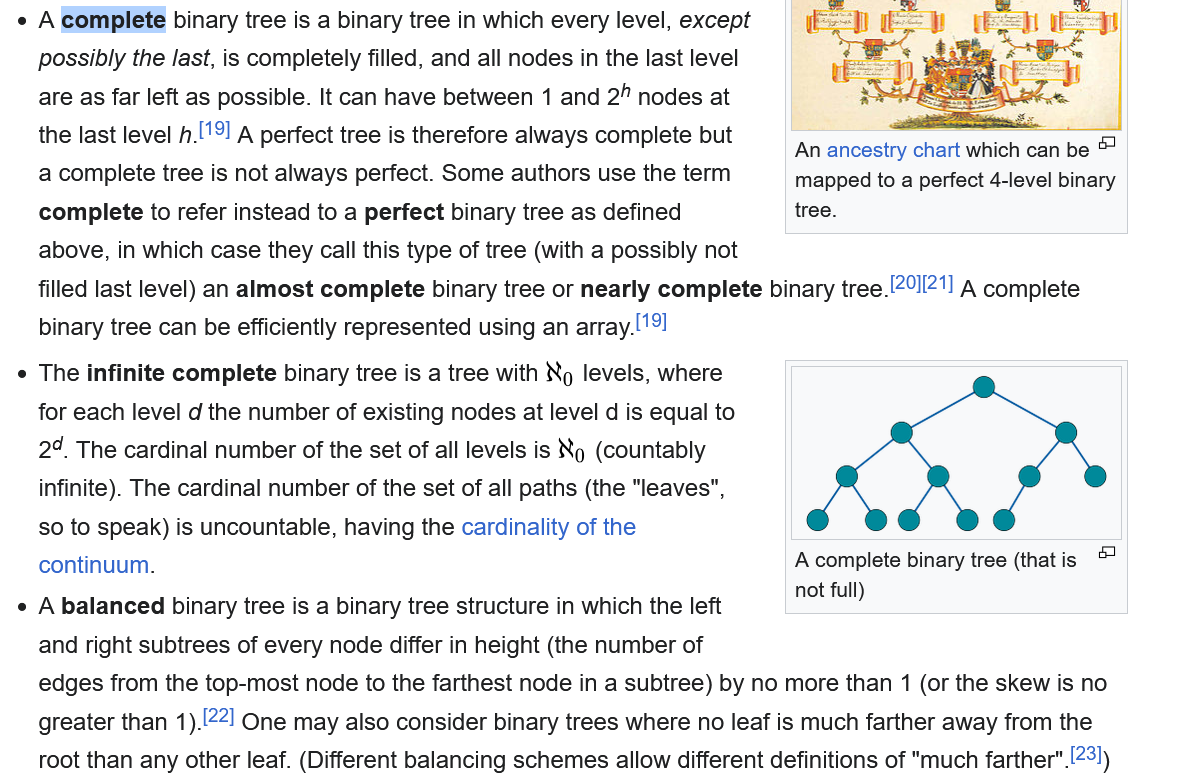

In [4]:
# In Python, we will use the heapq module
# Note: heapq only implements min heaps
from heapq import *

# Declaration: heapq does not give you a heap data structure.
# You just use a normal list, and heapq provides you with
# methods that can be used on this list to perform heap operations
heap = []

# Add to heap
heappush(heap, 1)
heappush(heap, 2)
heappush(heap, 3)

# Check minimum element
heap[0] # 1

# Pop minimum element
heappop(heap) # 1

# Get size
len(heap) # 2

# Bonus: convert a list to a heap in linear time
nums = [43, 2, 13, 634, 120]
heapify(nums)
nums

[2, 43, 13, 634, 120]

In [5]:
import heapq
nums = [43, 2, 13, 634, 120]
nums = [-i for i in nums]
heapq.heapify(nums)
sorted_nums = []
while nums:
    j = heapq.heappop(nums)
    sorted_nums.append(j)
sorted_nums

[-634, -120, -43, -13, -2]

#### Last Stone Weight

In [5]:
# You are given an array of integers stones where stones[i] is the weight of the ith stone. 
# On each turn, we choose the heaviest two stones and smash them together. 
# Suppose the heaviest two stones have weights x and y with x <= y. If x == y, then both stones are destroyed. 
# If x != y, then x is destroyed and y loses x weight.
# Return the weight of the last remaining stone, or 0 if there are no stones left.


In this problem, we need to repeatedly find the 2 maximum elements. Let's convert stones into a max heap, so that we can pop the two maximum elements in O(log⁡n), perform the smash and then re-add to the heap (if the stones aren't both destroyed) in O(log⁡n). We can continue the process until there are one or zero stones left.

In [ ]:
# Python's heap implementation only implements min heaps. 
# To simulate a max heap, we can just make all values we put on the heap negative.

import heapq

class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        stones = [-stone for stone in stones]
        heapq.heapify(stones) # turns an array into a heap in linear time
        while len(stones) > 1:
            first = abs(heapq.heappop(stones))
            second = abs(heapq.heappop(stones))
            if first != second:
                #insert a new element in the heap
                heapq.heappush(stones, -abs(first - second))

        return -stones[0] if stones else 0

#### Minimum Operations to Halve Array Sum

In [6]:
# You are given an array nums of positive integers. In one operation, you can choose any number from nums and 
# reduce it to exactly half the number.
# Return the minimum number of operations to reduce the sum of nums by at least half.

What is the best way to choose numbers to halve? We want to minimize the steps, so we want to maximize the amount we reduce nums by at each step. This means at any given moment, we should choose the largest element. To track the largest element at any given time, let's convert the input into a max heap. At each step, we pop the maximum x off, remove x / 2 from the sum, and then push x / 2 back onto the heap.

In [ ]:
import heapq

class Solution:
    def halveArray(self, nums: List[int]) -> int:
        target = sum(nums) / 2
        heap = [-num for num in nums]
        heapq.heapify(heap)
        
        ans = 0
        while target > 0:
            ans += 1
            x = heapq.heappop(heap)
            #becoz in python we have min heap so we multiply each num by -1, so to decrease target we can just add negated x.
            target += x / 2
            heapq.heappush(heap, x / 2)
        
        return ans

#### Find Median from Data Stream

Using multiple heaps is uncommon and the problems that require it are generally on the harder side. If a problem involves finding a median, it's a good thing to think about. The example we're about to look at involves medians and 480. Sliding Window Median can also be solved with two heaps, although we won't be including it as a practice problem as it is very difficult (you can still try it after if you want though).

480. Sliding Window Median

The median is the middle value in an ordered integer list. If the size of the list is even, the median is the average of the two middle values. Implement the MedianFinder class:

MedianFinder() initializes the MedianFinder object.

void addNum(int num) adds the integer num to the data structure.

double findMedian() returns the median of all elements so far.

#### Remove Stones to Minimize the Total

In [ ]:
# You are given a 0-indexed integer array piles, where piles[i] represents the number of stones in the ith pile, 
# and an integer k. You should apply the following operation exactly k times:
# Choose any piles[i] and remove floor(piles[i] / 2) stones from it.

# Notice that you can apply the operation on the same pile more than once.
# Return the minimum possible total number of stones remaining after applying the k operations.

# floor(x) is the greatest integer that is smaller than or equal to x (i.e., rounds x down).

In [ ]:
#think how can you use heap for finding maximum/minimum repeately ?
#here minimum can be acheived if you remove stones from max pile repeatedly so use heap




In [ ]:
import heapq
def halve(piles, k):
    heap = [-i for i in piles]
    heapq.heapify(piles)
    
    while k>0:
        k -=1
        x = heapq.heappop(heap)
        
        #becoz in python we have min heap so we multiply eah num by -1, 
        #so to decrease target we can just add negated x.        
        
        heapq.heappush(heap, -floor(-x / 2))
    
    heap = [-i for i in heap]
    try :
        return sum(heap)
    except:
        return 0


   
    

In [14]:
class Solution:
    def minStoneSum(self, piles: List[int], k: int) -> int:
        heap = [-num for num in piles]
        heapq.heapify(heap)
        
        for _ in range(k):
            curr = -heapq.heappop(heap)
            remove = curr // 2
            heapq.heappush(heap, -(curr - remove))
        
        return -sum(heap)
        

0

#### Minimum Cost to Connect Sticks

In [7]:
# You have some number of sticks with positive integer lengths. 
# These lengths are given as an array sticks, where sticks[i] is the length of the ith stick.

# You can connect any two sticks of lengths x and y into one stick by paying a cost of x + y. 
# You must connect all the sticks until there is only one stick remaining.

# Return the minimum cost of connecting all the given sticks into one stick in this way.

In [15]:
# Input: sticks = [2,4,3]
# Output: 14
# Explanation: You start with sticks = [2,4,3].
# 1. Combine sticks 2 and 3 for a cost of 2 + 3 = 5. Now you have sticks = [5,4].
# 2. Combine sticks 5 and 4 for a cost of 5 + 4 = 9. Now you have sticks = [9].
# There is only one stick left, so you are done. The total cost is 5 + 9 = 14.

In [36]:
def cost_stick(sticks):
    
    heapq.heapify(sticks)
    cost = 0
    
    while len(sticks)>1:
        
            
        stick1 = heapq.heappop(sticks)
        stick2 = heapq.heappop(sticks)

        cost += (stick1 + stick2)
        
        
        
        heapq.heappush(sticks,(stick1 + stick2) )
        

    return cost

cost_stick([1,8,3,5])       

30

#### Top K Frequent Elements

In [37]:
# Given an integer array nums and an integer k, return the k most frequent elements. 
# It is guaranteed that the answer is unique.

In [28]:
nums = [1,1,1,2,2,3,3,3,3,3]
k = 2
from collections import Counter
x = dict(Counter(nums))

x = dict(sorted(x.items(), key=lambda item: item[1], reverse=True))
ans = []
for i, j in x.items():
    if k>0:
        ans.append(i)
        k -=1
        
ans

[3, 1]

In [46]:
#without heaps solution
from collections import defaultdict

nums = [1,1,1,2,2,3]
k = 2

x = defaultdict(int)
for i in nums:
    x[i] +=1

x = dict(sorted(x.items(), key=lambda item: item[1], reverse=True))

for a, b in x.items():    
    
    if k>0: print(a)
    k -=1

1
2


In [27]:
import heapq
nums = [1,1,1,2,2,3,3, 3, 3, 3]
k = 1

from collections import Counter
dict1 = Counter(nums)
heap = []
for x, y in dict1.items():
    heapq.heappush(heap, (y,x))
    

while len(heap)>k:
    
    heapq.heappop(heap)
    

[pair[1] for pair in heap]

[3]

In [28]:
nums = [1,1,1,2,2,3,3, 3, 3, 3, 4, 4, 4, 4, 4]
from collections import Counter
import heapq

class Solution:
    def topKFrequent(self, nums, k):
        counts = Counter(nums)
        heap = []
        
        for key, val in counts.items():
            #we are storing freq, key in this order becoz min heap operates on left element
            heapq.heappush(heap, (val, key))
            
            #number of pops are len(heap)-k
            if len(heap) > k:
                heapq.heappop(heap)
        
        return ([pair[1] for pair in heap], heap)

In [20]:
Solution().topKFrequent(nums, 2)

([3, 4], [(5, 3), (5, 4)])

#### Find K Closest Elements

In [47]:
# Given a sorted integer array arr, two integers k and x, return the k closest integers to x. 
# The answer should also be sorted in ascending order. If there are ties, take the smaller elements.

In [ ]:
import heapq

class Solution:
    def findClosestElements(self, arr: List[int], k: int, x: int) -> List[int]:
        heap = []
        
        for num in arr:
            distance = abs(x - num)
            heapq.heappush(heap, (-distance, -num))
            if len(heap) > k:
                heapq.heappop(heap)
        
        return sorted([-pair[1] for pair in heap])

#### Kth Largest Element in an Array

In [48]:
# Given an integer array nums and an integer k, return the kth largest element in the array.
# Note that it is the kth largest element in the sorted order, not the kth distinct element.

# Can you solve it without sorting?

In [36]:
nums, k = [5, 4, 1, 16, 0] , 5
nums = [-1*i for i in nums] #[-16, -5, -4, -1, 0] 
heapq.heapify(nums)

for _ in range(k-1):
    heapq.heappop(nums)
print(-1*nums[0])
    

0


In [ ]:
def klargest(nums, k):
    
    heapq.heapify(nums)
    
    for _ in range(len(nums)-k):
        heapq.heappop(nums)
    
    return nums[0]
        
        
        

In [58]:
nums , k = [2,1,5,4,16,0], 3
heapq.heapify(nums)
    
for _ in range(len(nums)-k):
    heapq.heappop(nums)
#see how as per heap's property --> parent node is less than the children
nums

[4, 5, 16]

#### K Closest Points to Origin

Given an array of points where points[i] = [xi, yi] represents a point on the X-Y plane and an integer k, return the k closest points to the origin (0, 0).

The distance between two points on the X-Y plane is the Euclidean distance (i.e., √(x1 - x2)2 + (y1 - y2)2).

You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).

In [ ]:
def kclosest(points, k):
    heap = []
    
    origin = np.array([0,0])
    
    for point in points:
        temp = np.array(point) - origin
        distance = np.sqrt(np.dot(temp.T, temp))
        
        heapq.heappush(heap, (-distance, point))
        
        if len(heap) > k:
            heapq.heappop(heap)

    return [pair[1] for pair in heap]

In [41]:
t1, t2 = np.array([0,0]), np.array([1,1])
temp = t2-t1
# temp.T, temp
temp1 = temp.T
np.sqrt(np.dot(temp, temp)), temp.shape, temp1.shape

(1.4142135623730951, (2,), (2,))

#### Kth Largest Element in a Stream

In [ ]:
import heapq
class KthLargest:

    def __init__(self, k: int, nums: List[int]):
        self.k = k
        self.nums = nums
        heapq.heapify(self.nums)

    def add(self, val: int) -> int:
        heapq.heappush(self.nums, val)
        n = len(self.nums)
        
        
        for _ in range(n-self.k):
            heapq.heappop(self.nums)
        
        return self.nums[0]

#### Total Cost to hire K workers

In [ ]:
You are given a 0-indexed integer array costs where costs[i] is the cost of hiring the ith worker.

You are also given two integers k and candidates. We want to hire exactly k workers 
according to the following rules:

You will run k sessions and hire exactly one worker in each session.
In each hiring session, choose the worker with the lowest cost 
from either the first candidates workers or the last candidates workers. 
Break the tie by the smallest index.
For example, if costs = [3,2,7,7,1,2] and candidates = 2, then in the first hiring session, 
we will choose the 4th worker because they have the lowest cost [3,2,7,7,1,2].
In the second hiring session, we will choose 1st worker because they have 
the same lowest cost as 4th worker but they have the smallest index [3,2,7,7,2]. 
Please note that the indexing may be changed in the process.
If there are fewer than candidates workers remaining, 
choose the worker with the lowest cost among them. Break the tie by the smallest index.
A worker can only be chosen once.

Return the total cost to hire exactly k workers.

In [48]:

#Solution without using Heap: TLE 

costs = [17,12,10,2,7,2,11,20,8]
k = 3
candidates = 4

class Solution:
    def totalCost(self, costs, k, candidates):
        total_cost = 0       
        

        for _ in range(k):
            if len(costs) < candidates:
                min_cost = min(costs)
                total_cost += min_cost
                index1 = costs.index(min_cost) 
                costs.pop(index1)
            
            else:
                first_candidates = costs[:candidates]
                last_candidates = costs[-candidates:]

                min1, min2 = min(first_candidates), min(last_candidates)
                
                if min1 < min2:
                    total_cost += min1
                    index1  = first_candidates.index(min1) 
                    costs.pop(index1)

                elif (min2 <  min1):
                    total_cost += min2
                    index1  = last_candidates.index(min2) - candidates
                    costs.pop(index1)
                
                else:
                    total_cost += min1
                    index1 = first_candidates.index(min1) 
                    costs.pop(index1)
        
        return total_cost
    
Solution().totalCost(costs, k, candidates)

11

In [5]:
# Example 1:

# Input: costs = [17,12,10,2,7,2,11,20,8], k = 3, candidates = 4
# Output: 11
# Explanation: We hire 3 workers in total. The total cost is initially 0.
# - In the first hiring round we choose the worker from [17,12,10,2,7,2,11,20,8]. The lowest cost is 2, and we break the tie by the smallest index, which is 3. The total cost = 0 + 2 = 2.
# - In the second hiring round we choose the worker from [17,12,10,7,2,11,20,8]. The lowest cost is 2 (index 4). The total cost = 2 + 2 = 4.
# - In the third hiring round we choose the worker from [17,12,10,7,11,20,8]. The lowest cost is 7 (index 3). The total cost = 4 + 7 = 11. Notice that the worker with index 3 was common in the first and last four workers.
# The total hiring cost is 11.




In [ ]:
# Example 2:

# Input: costs = [1,2,4,1], k = 3, candidates = 3
# Output: 4
# Explanation: We hire 3 workers in total. The total cost is initially 0.
# - In the first hiring round we choose the worker from [1,2,4,1]. The lowest cost is 1, and we break the tie by the smallest index, which is 0. The total cost = 0 + 1 = 1. Notice that workers with index 1 and 2 are common in the first and last 3 workers.
# - In the second hiring round we choose the worker from [2,4,1]. The lowest cost is 1 (index 2). The total cost = 1 + 1 = 2.
# - In the third hiring round there are less than three candidates. We choose the worker from the remaining workers [2,4]. The lowest cost is 2 (index 0). The total cost = 2 + 2 = 4.
# The total hiring cost is 4.


In [88]:
#Incorrect

# costs, candidates, k = [1,2,4,1], 3, 3 #Expected Output = 4
# costs, candidates, k =[17,12,10,2,7,2,11,20,8], 4, 3 #Expected Output = 11


total_cost = 0       

cost1= costs.copy()

start = candidates-1
end = -candidates

first_candidates = costs[:candidates]
last_candidates = costs[-candidates:]


# candidates <= costs.length

heapq.heapify(first_candidates),heapq.heapify(last_candidates)

for _ in range(3):
    
    #To avoid double counting, we should not add a worker to both queues or update either pointer.
    #Therefore, we can simply move on without making any updates to the queues or pointers.
    if len(cost1) <= 2*candidates:
        
        min_cost = min(cost1)
        index1 = cost1.index(min_cost)
        total_cost += min_cost
        cost1.pop(index1)


    else:                              

        # min1, min2 = min(first_candidates), min(last_candidates)
        min1, min2 = heapq.heappop(first_candidates),heapq.heappop(last_candidates)



        if min1 <= min2:
            total_cost += min1
            start +=1
            heapq.heappush(first_candidates, costs[start])
            heapq.heappush(last_candidates, min2)
            
            cost1.pop(start-1)
            

        else :
            total_cost += min2
            end -=1 
            heapq.heappush(last_candidates, costs[end])
            heapq.heappush(first_candidates, min1)
            
            cost1.pop(end+1)
            
total_cost

4

In [ ]:
#Correct Solution from editorial part of the problem on leetcode
class Solution:
    def totalCost(self, costs: List[int], k: int, candidates: int) -> int:
        # head_workers stores the first k workers.
        # tail_workers stores at most last k workers without any workers from the first k workers. 
        head_workers = costs[:candidates]
        tail_workers = costs[max(candidates, len(costs) - candidates):]
        heapify(head_workers)
        heapify(tail_workers)
        
        answer = 0
        next_head, next_tail = candidates, len(costs) - 1 - candidates 

        for _ in range(k): 
            if not tail_workers or head_workers and head_workers[0] <= tail_workers[0]: 
                answer += heappop(head_workers)

                # Only refill the queue if there are workers outside the two queues.
                if next_head <= next_tail: 
                    heappush(head_workers, costs[next_head])
                    next_head += 1
            else: 
                answer += heappop(tail_workers)

                # Only refill the queue if there are workers outside the two queues.
                if next_head <= next_tail:  
                    heappush(tail_workers, costs[next_tail])
                    next_tail -= 1
                    
        return answer

#### Meeting Rooms

In [13]:
# https://interviewing.io/questions/meeting-rooms

# https://medium.com/nerd-for-tech/meeting-room-amazon-interview-problem-72609de8d776

In [1]:
# Given a list of meetings, represented as tuples with a start and an end time, 
# determine the minimum number of rooms required to schedule all the meetings.


# Input: meetings = [[5, 10], [2, 3]] Output: 1
# Input: meetings = [[1, 3], [5, 7], [4, 6], [7, 9], [9, 10]] Output: 2
# Input: meetings = [[9,10],[4,9],[5,17]]  Output: 2

In [ ]:
#documenting initial self thought process lets see meeting sorted end times, 
#we know between two consequitive end time times only one meeting can start 
#as the meeting room is empty, if two or more meetings have start time between 2 consequitive end times 
#then we need aditional rooms 

#first sort start time and end time
#we sort end time to know when meeting rooms are empty
#we sort start time to know in what order rooms are required 


In [ ]:
#An analogus thought is - lets see meeting sorted start times,
#we know between two consequitive start times, we need atleast one meeting end, else it means all rooms 
#are occupied and we need an additional room

In [47]:
import heapq
meetings = [[1, 3], [5, 7], [4, 6], [7, 9], [9, 10]] #expected output = 2
# meetings =[[9,10],[4,9],[5,17]] #expected output = 2
# meetings = [[5, 10], [2, 3]] #expected output = 1

start_time, end_time = sorted([z[0] for z in meetings]), sorted([z[1] for z in meetings])
rooms = 1



end_time.insert(0, 0) #to make sure first interval starts at 0 for end times
for i in range(len(end_time)-1):
    
    left = end_time[i]
    right = end_time[i+1]
    

    
    count = 0
    for k in range(len(start_time)):
        meet_start = start_time[k]
        
        if (meet_start >= right): #start time is out of range of current end times, so move to next range
            break
        
        
        if (meet_start<right)&(meet_start>left):
            #print(left, meet_start, right)
            count += 1
    
    if count > 1:
        rooms += count-1
            
rooms           
    


2

In [ ]:
#with heaps
#idea: all we have to do is take a start time of meeting and compare with previous meeting end time
#if start time is > prev end time then no need of new room, else need of extra room 

In [56]:
meetings = [[1, 3], [5, 7], [4, 6], [7, 9], [9, 10]] #expected output = 2
# meetings =[[9,10],[4,9],[5,17]] #expected output = 2
# meetings = [[5, 10], [2, 3]] #expected output = 1


start_time, end_time = [z[0] for z in meetings], [z[1] for z in meetings]

heapq.heapify(start_time)
heapq.heapify(end_time)

rooms = 0
for i in range(len(start_time)):
    if i==0:
        rooms +=1
        heapq.heappop(start_time)
    else:
        immediate_start, prev_end = heapq.heappop(start_time), heapq.heappop(end_time)
        if immediate_start < prev_end:
            rooms +=1
            heapq.heappush(end_time, prev_end)
rooms

2

##### without heaps

In [35]:
from collections import defaultdict
hash_meet = defaultdict(list)

meetings = [[1, 3], [5, 7], [4, 6], [7, 9], [9, 10]]
meetings = [[5, 10], [2, 3]]
for i in meetings:
    hash_meet[i[0]].append(i[1]) 

x = dict(hash_meet)
x = dict(sorted(x.items(), key=lambda item: item[0], reverse=False)) #sorting on start time

ans = 0
count = 0
for i, j in x.items():
    
    if count==0:
        
        ans+=1
    
    else:
        for n in prev_end: 
            if n > i: #checking if start is happening before previous end
                ans +=1
            else:
                continue
    prev_end = j  #updating with current meetings end time which is a list
    count +=1
ans

1

In [31]:
from collections import defaultdict
hash_meet = defaultdict(list)

meetings = [[1, 3], [5, 7], [4, 6], [7, 9], [9, 10]]
# meetings = [[5, 10], [2, 3]]
for i in meetings:
    hash_meet[i[0]].append(i[1])
x = dict(hash_meet)
x = dict(sorted(x.items(), key=lambda item: item[0], reverse=False)) #sorting on start time
x

{1: [3], 4: [6], 5: [7], 7: [9], 9: [10]}

##### with heaps

In [28]:
meetings = [[1, 3], [5, 7], [4, 6], [7, 9], [9, 10]]
 # sort meetings in ascending order by start time

meetings.sort(key = lambda x: x[0])

#create two min heaps one on start time and one on end time, 
#do x1 = heapq.heappop(start_heap) and x2 = heapq.heappop(end_heap), if x2<x1: rooms +=1
#continue above until len(start_heap)> 0

[1,4,5,7,9]
[3,6,7,9,10]


[[1, 3], [4, 6], [5, 7], [7, 9], [9, 10]]

In [33]:
import heapq
class Solution:
    def minMeetingRooms(self, meetings) -> int:
        if not meetings: return 0      

        # sort meetings in ascending order by start time
        meetings.sort(key = lambda x: x[0])        

        # initialize heap and add the first meeting's end
        rooms = []
        
        #push first end time        
        heapq.heappush(rooms, meetings[0][1])    

        for [start, end] in meetings[1:]:

        # top of the heap is the meeting that will end soonest
        # we can remove it if it ends before the next meeting starts

            if rooms[0] <= start:
                heapq.heappop(rooms)               
            
            heapq.heappush(rooms, end)
            print(rooms)
        

        # the size of the heap at the end is the minimum rooms required
        return len(rooms)

In [34]:
Solution().minMeetingRooms(meetings)

[6]
[6, 7]
[7, 9]
[9, 10]


2

#### Find K pairs with smallest sum

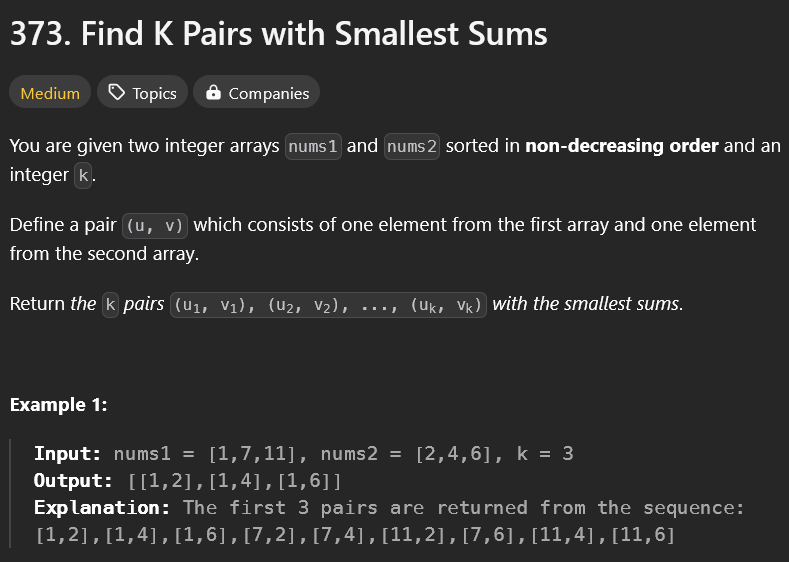

In [ ]:
#We cannot use backtracking here as look at the constraints below:
# 1 <= nums1.length, nums2.length <= 105

In [ ]:
# Example 1:

# Input: nums1 = [1,7,11], nums2 = [2,4,6], k = 3
# Output: [[1,2],[1,4],[1,6]]
# Explanation: The first 3 pairs are returned from the sequence: [1,2],[1,4],[1,6],[7,2],[7,4],[11,2],[7,6],[11,4],[11,6]

# Example 2:

# Input: nums1 = [1,1,2], nums2 = [1,2,3], k = 2
# Output: [[1,1],[1,1]]
# Explanation: The first 2 pairs are returned from the sequence: [1,1],[1,1],[1,2],[2,1],[1,2],[2,2],[1,3],[1,3],[2,3]


In [5]:
#TLE
import heapq
from typing import List

class Solution:
    def kSmallestPairs(self, nums1: List[int], nums2: List[int], k: int) -> List[List[int]]:
        heap = []
        heapq.heapify(heap)
        
        #this is a O(N2 solution)
        
        for i in range(len(nums1)):
            for j in range(len(nums2)):
                heapq.heappush(heap, (-1*(nums1[i]+ nums2[j]), nums1[i], nums2[j] ))
                if len(heap) > k:
                    heapq.heappop(heap)
                
        
        return [[pair[1], pair[2]] for pair in heap]

# nums1, nums2, k = [1,7,11], [2,4,6], 3 
nums1, nums2, k = [1,1,2],[1,2,3], 2
Solution().kSmallestPairs(nums1, nums2, k)

[[1, 1], [1, 1]]

In [7]:
class Solution:
    def kSmallestPairs(self, nums1: List[int], nums2: List[int], k: int) -> List[List[int]]:
        from heapq import heappush, heappop
        m = len(nums1)
        n = len(nums2)

        ans = []
        visited = set()

        minHeap = [(nums1[0] + nums2[0], (0, 0))]
        visited.add((0, 0))
        count = 0

        while k > 0 and minHeap:
            val, (i, j) = heappop(minHeap)
            ans.append([nums1[i], nums2[j]])

            if i + 1 < m and (i + 1, j) not in visited:
                heappush(minHeap, (nums1[i + 1] + nums2[j], (i + 1, j)))
                visited.add((i + 1, j))

            if j + 1 < n and (i, j + 1) not in visited:
                heappush(minHeap, (nums1[i] + nums2[j + 1], (i, j + 1)))
                visited.add((i, j + 1))
            k = k - 1
        
        return ans
    
nums1, nums2, k = [1,1,2],[1,2,3], 2
Solution().kSmallestPairs(nums1, nums2, k)

[[1, 1], [1, 1]]

#### 2070 Most Beautiful item 

In [ ]:
# You are given a 2D integer array items where items[i] = [pricei, beautyi] denotes the price and beauty 
# of an item respectively.

# You are also given a 0-indexed integer array queries. For each queries[j], you want to determine 
# the maximum beauty of an item 
# whose price is less than or equal to queries[j]. If no such item exists, 
# then the answer to this query is 0.

# Return an array answer of the same length as queries where answer[j] is the answer to the jth query.

 

# Example 1:

# Input: items = [[1,2],[3,2],[2,4],[5,6],[3,5]], queries = [1,2,3,4,5,6]
# Output: [2,4,5,5,6,6]
# Explanation:
# - For queries[0]=1, [1,2] is the only item which has price <= 1. Hence, the answer for this query is 2.
# - For queries[1]=2, the items which can be considered are [1,2] and [2,4]. 
#   The maximum beauty among them is 4.
# - For queries[2]=3 and queries[3]=4, the items which can be considered are [1,2], [3,2], [2,4], and [3,5].
#   The maximum beauty among them is 5.
# - For queries[4]=5 and queries[5]=6, all items can be considered.
#   Hence, the answer for them is the maximum beauty of all items, i.e., 6.

# Example 2:

# Input: items = [[1,2],[1,2],[1,3],[1,4]], queries = [1]
# Output: [4]
# Explanation: 
# The price of every item is equal to 1, so we choose the item with the maximum beauty 4. 
# Note that multiple items can have the same price and/or beauty.  

# Example 3:

# Input: items = [[10,1000]], queries = [5]
# Output: [0]
# Explanation:
# No item has a price less than or equal to 5, so no item can be chosen.
# Hence, the answer to the query is 0.


In [ ]:
#TLE
import heapq
class Solution:
    def maximumBeauty(self, items: List[List[int]], queries: List[int]) -> List[int]:
        heap = []
        ans = []
        for item in items:
            
            heapq.heappush(heap, (item[0], item[1]))
        for _ in range(len(heap)):
            ans.append(heapq.heappop(heap))
        prices = [i[0] for i in ans ]
        beauty = [i[1] for i in ans] 

        def binary_search(target):
            left = 0
            right = len(prices)
            while left < right:
                mid = (left + right) // 2
                if prices[mid] > target:
                    right = mid
                else:
                    left = mid + 1

            return left
        
        final_ans = []
        for i in queries:
            index1 = binary_search(i)
            try:
                final_ans.append(max(beauty[:index1]))
            except:
                final_ans.append(0)
        
        return final_ans

In [20]:
items = [[1,2],[3,2],[2,4],[5,6],[3,5]]
items.sort(key = lambda item: (item[0], -item[1])) #if first item is same it places in descending order (hence - sign) of 2nd element
items

[[1, 2], [2, 4], [3, 5], [3, 2], [5, 6]]

In [21]:
items = [[1,2],[3,2],[2,4],[5,6],[3,5]]
items.sort()
items

[[1, 2], [2, 4], [3, 2], [3, 5], [5, 6]]

In [ ]:
#TLE , without Heaps

class Solution:
    def maximumBeauty(self, items: List[List[int]], queries: List[int]) -> List[int]:
        # heap = []
        # ans = []
        # for item in items:
            
        #     heapq.heappush(heap, (item[0], item[1]))
        # for _ in range(len(heap)):
        #     ans.append(heapq.heappop(heap))
        items.sort()
        prices = [i[0] for i in items ]
        beauty = [i[1] for i in items] 

        def binary_search(target): #intead of this use bisect.bisect_left()
            left = 0
            right = len(prices)
            while left < right:
                mid = (left + right) // 2
                if prices[mid] > target:
                    right = mid
                else:
                    left = mid + 1

            return left
        
        final_ans = []
        for i in queries:
            index1 = binary_search(i)
            try:
                final_ans.append(max(beauty[:index1]))
            except:
                final_ans.append(0)
        
        return final_ans

In [22]:
# https://www.youtube.com/watch?v=P9wifJRXmbQ
# Better Solution

In [ ]:
class Solution:
    def maximumBeauty(self, items: List[List[int]], queries: List[int]) -> List[int]:
        items.sort(key = lambda item: (item[0], -item[1]))
        
        #max beauty so far
        best = 0
        pitems = []
        for p, b in items:
            best = max(b, best)
            pitems.append((p, best))
            
            
        ans = []
        for q in queries:
            index = bisect.bisect_left(pitems, (q+1, 1))
            
            if index-1 >= 0:
                ans.append(pitems[index-1][1])
            else:
                ans.append(0)
        return ans